<a href="https://colab.research.google.com/github/Tagtshen/Computational-physics-Assignments-/blob/main/ASSIGNMENT_4_Tagtshen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1: Random number generation using Linear Congruential random Number generator

Execution time for LCG: 0.008500337600708008


<Figure size 1000x800 with 0 Axes>

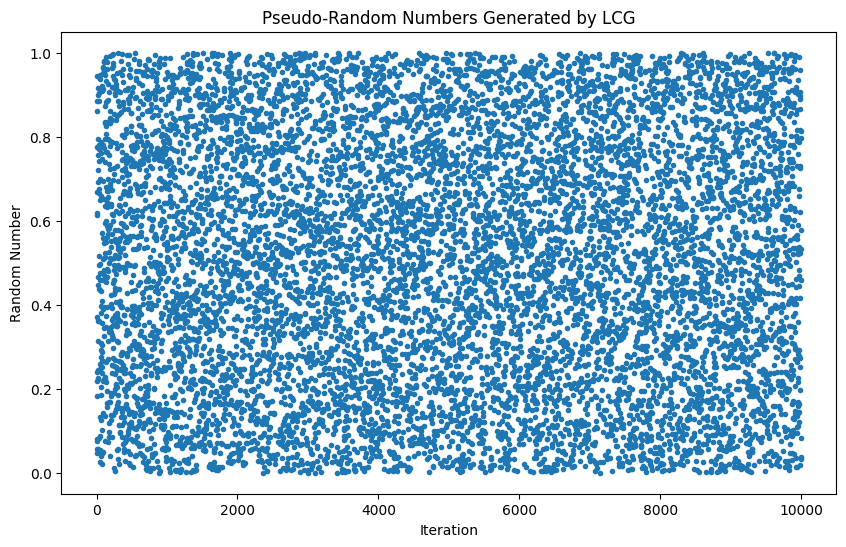

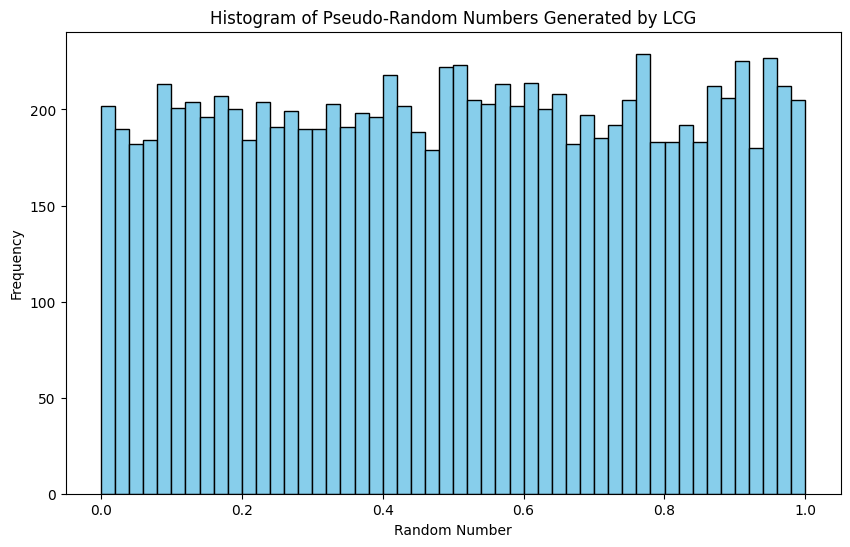

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import time

a=191293
b=139941249
m=934124814801
n= 10001
seed=235432
x_next=seed
start=time.time()
x_values=[]

for i in range(n):
 x_next=(a*x_next+b)%m
 x_values.append(x_next)

end=time.time()
execution_time= end-start

x_normalized=[x / m for x  in x_values] #normalised to create the random number between 0 and 1

print('Execution time for LCG:',execution_time)

plt.figure(figsize=(10,8))
plt.figure(figsize=(10, 6))
plt.plot(x_normalized[:10001], marker='.', linestyle='none') #plot of frist 100 random number
plt.title('Pseudo-Random Numbers Generated by LCG')
plt.xlabel('Iteration')
plt.ylabel('Random Number')

plt.figure(figsize=(10, 6))
plt.hist(x_normalized[:10000], bins=50, color='skyblue', edgecolor='black') # plot histogram of first 10000 random numbers
plt.title('Histogram of Pseudo-Random Numbers Generated by LCG')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.show()

plt.show()



QUESTION 2: Random nunber generation using np.random.rand()

execution time = 0.005298137664794922


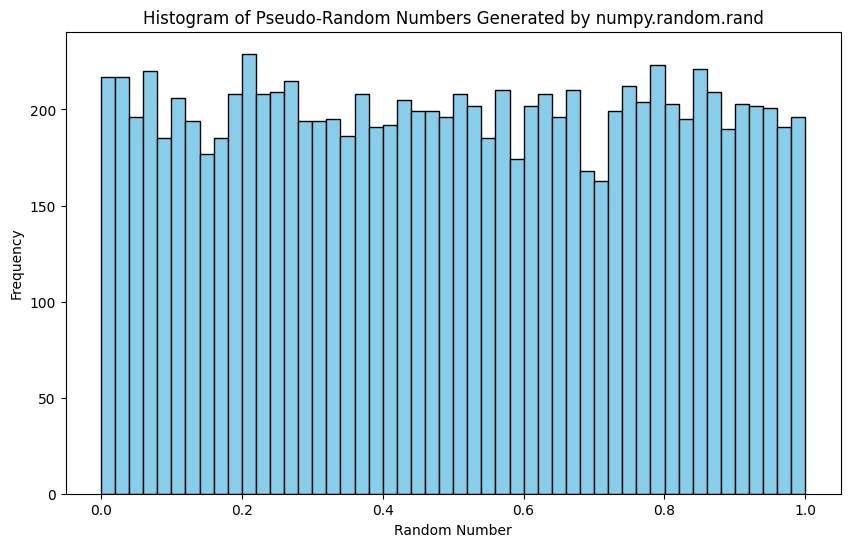

In [54]:
import numpy as np
import matplotlib.pyplot as plt
n=10000
start=time.time()
random=np.random.rand(n)
end=time.time()

print("execution time =",end-start)

plt.figure(figsize=(10, 6))
plt.hist(random[:10000], bins=50, color='skyblue', edgecolor='black') # plot histogram of first 10000 random numbers
plt.title("Histogram of Pseudo-Random Numbers Generated by numpy.random.rand")
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.show()

plt.show()


QUESTION 3: Transformation method


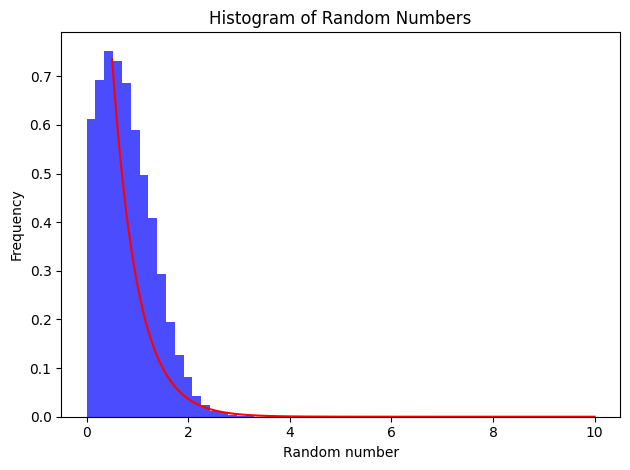

In [117]:
import numpy as np
import matplotlib.pyplot as plt

n=10000
x_rand=np.random.rand(10000)
t = np.linspace(0.5, 10, n)
y=-np.log(x_rand)
mean=0.5
plt.hist(random, bins=20, density=True, color='blue', alpha=0.7)
plt.plot(t,(1/mean)*np.exp(-t/mean), color='red', label='exponential distribution ')
plt.xlabel('Random number')
plt.ylabel('Frequency')
plt.title('Histogram of Random Numbers')
plt.tight_layout()
plt.show()


QUESTION 5: Box Muller Method

<ipython-input-125-1278e0739be8>:9: RuntimeWarning: invalid value encountered in sqrt
  z0=np.sqrt(-2*np.log(np.sqrt(2*np.pi)*x1))*np.cos(2*np.pi*x2)
<ipython-input-125-1278e0739be8>:10: RuntimeWarning: invalid value encountered in sqrt
  z1=np.sqrt(-2*np.log(np.sqrt(2*np.pi)*x1))*np.sin(2*np.pi*x2)


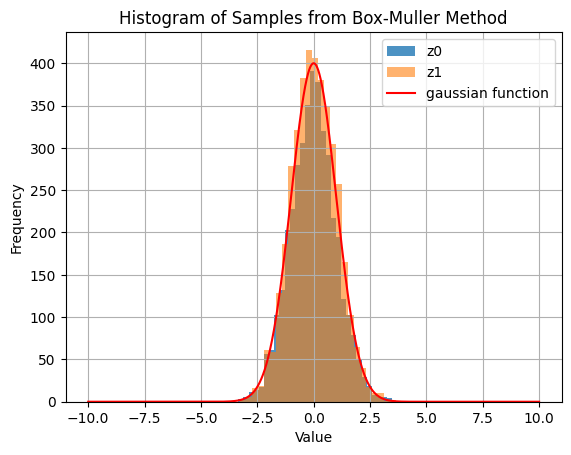

In [125]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_(x):
 return 400*np.exp(-(x**2)/2)
def Box_muller(n): #defining fucniton for box muller method
 x1=np.random.rand(n)
 x2=np.random.rand(n)
 z0=np.sqrt(-2*np.log(np.sqrt(2*np.pi)*x1))*np.cos(2*np.pi*x2)
 z1=np.sqrt(-2*np.log(np.sqrt(2*np.pi)*x1))*np.sin(2*np.pi*x2)
 return z0,z1
n=10000
z0,z1=Box_muller(n)
x = np.linspace(-10, 10, n)
plt.hist(z0, bins=30, alpha=0.8, label='z0')
plt.hist(z1, bins=30, alpha=0.6, label='z1')
plt.title('Histogram of Samples from Box-Muller Method')
plt.plot(x, gaussian_(x), color='red', label='gaussian function')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

QUESTION 6: Rejection method


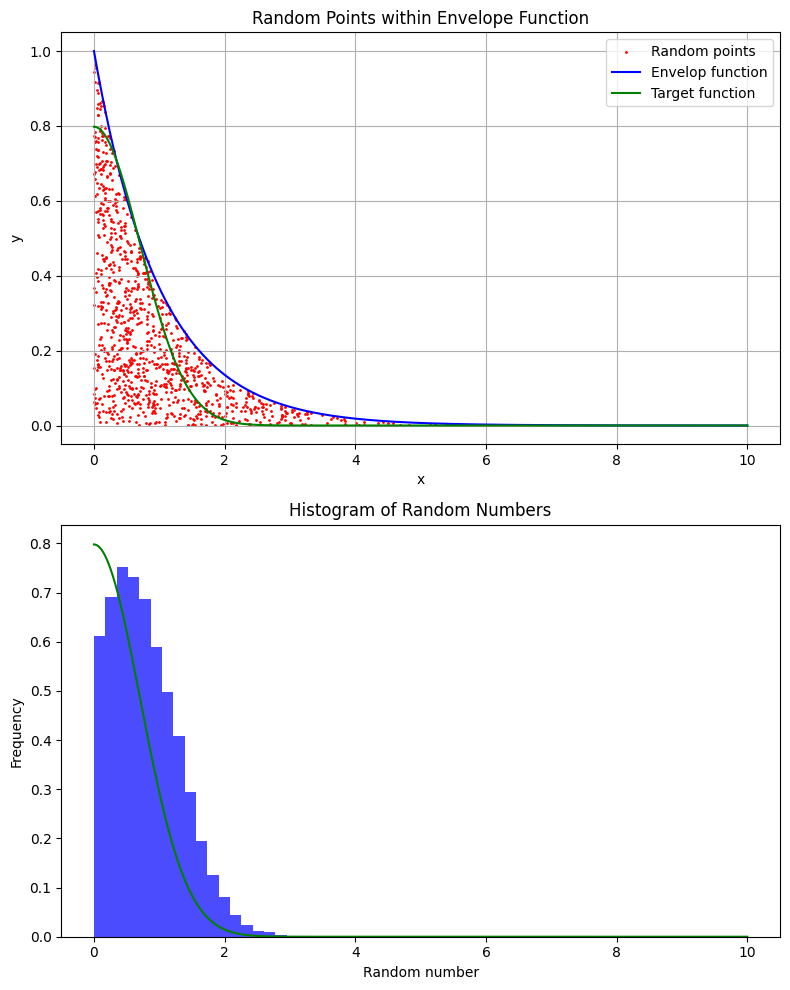

In [85]:
import numpy as np
import matplotlib.pyplot as plt

def envelop_(m):
    return np.exp(-m)

def target_(t):
    return np.sqrt(2/np.pi)*np.exp(-t**2)

def generate_random(n):
    points = []
    random = []
    while len(points) < n:
        x = np.random.uniform(0, 10)
        y = np.random.uniform(0, 10)
        u = np.random.uniform(0, 1)
        if y <= envelop_(x):
            points.append((x, y))
        if u <= target_(x)/envelop_(x):
            random.append(x)
    return points, random

n = 1000
points, random = generate_random(n)
x_val, y_val = zip(*points)

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.scatter(x_val, y_val, color='red', s=1, label='Random points')
m = np.linspace(0, 10, n)
t = np.linspace(0, 10, n)
plt.plot(m, envelop_(m), color='blue', label='Envelop function')
plt.plot(t, target_(t), color='green', label='Target function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Points within Envelope Function')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.hist(random, bins=20, density=True, color='blue', alpha=0.7)
plt.plot(t, target_(t), color='green', label='Target function')
plt.xlabel('Random number')
plt.ylabel('Frequency')
plt.title('Histogram of Random Numbers')
plt.tight_layout()
plt.show()
